**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/underfitting-and-overfitting).**

---


## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [3]:
#impor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
#membuat dataset sintetis
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

In [5]:
#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [6]:
#membuat model regresi linier
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
#Hitung dan tampilkan skor R-squared dan MSE (Mean Squared Error) untuk model regresi linear:
y_pred = lr.predict(X_test)
r2 = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (Linear Regression): {r2:.2f}")
print(f"MSE (Linear Regression): {mse:.2f}")

R-squared (Linear Regression): 0.60
MSE (Linear Regression): 0.20


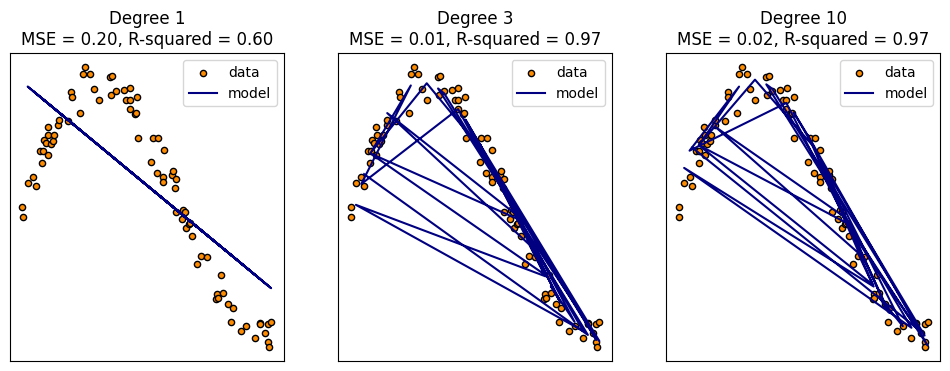

In [8]:
#model regresi polinomial dengan derajat yang berbeda untuk menunjukkan underfitting dan overfitting.
degrees = [1, 3, 10]
plt.figure(figsize=(12, 4))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y_train)

    y_poly_pred = lr_poly.predict(poly_features.transform(X_test))
    mse_poly = mean_squared_error(y_test, y_poly_pred)
    r2_poly = lr_poly.score(poly_features.transform(X_test), y_test)

    plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_test, y_poly_pred, color="navy", label="model")
    plt.title(f"Degree {degree}\nMSE = {mse_poly:.2f}, R-squared = {r2_poly:.2f}")
    plt.legend()

plt.show()
